In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

HW6

Task 1

In a loop, create 200 further generations. In order to create a new generation, take the current individual, and randomly flip one of its bits.
Repeat the whole experiment 1000 times and plot all the values, that is, the sum of the 100 components, versus the respective generation number in order to show how values evolve over time.

In [4]:
np.random.seed(0)

In [118]:
X=np.zeros([1000,100])
"X is a 1000x100 matrix, each row is one experiment"
"Value is a colomen vector, recording sum of each row"
"mean of value is the average performace of current generation"
flip=np.zeros(200)
values=np.zeros([1000,1])
difference=np.zeros(200)

In [119]:
#once generation
for j in range(200):
    for i in range(1000):
        index=np.random.randint(0,100)
        if X[i][index]==0:
            X[i][index]=1
        else:
            X[i][index]=0
    values=X.sum(axis=1)
    value=values.mean(axis=0)
    flip[j]=value


48.912


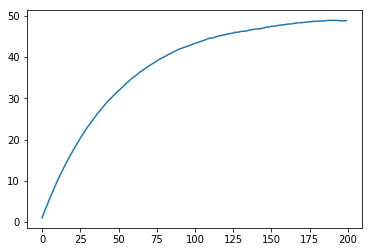

In [121]:
plt.plot(flip)
print(max(flip))

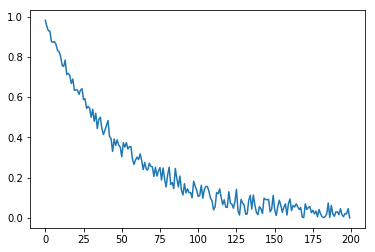

In [122]:
for i in range(199):
    difference[i]=flip[i+1]-flip[i]
plt.plot(abs(difference))

Observation:

The performace was less than 50 of 1s.
The difference fluctuates alot bewteen current and next generation, since the flip is random, and it may be better than last one, or maybe worse(flip existing 1 back to 0).

Task2

In the same way as above, study a slightly different scenario where a parent creates c children – each based on a single bit flip, and the new individual is best(children, parent).

compare children and parents, save the best one to be next generation.

below are funct that decided the best between mutiple children and parents

In [13]:
def mutation(generation,children):
    x=np.zeros([1000,100])
    pre=[]
    values=np.zeros([1000,1])
    flip=np.zeros(generation)
    experiment=1000
    
    for i in range(200):  #200
        for j in range(1000):  #1000         
            pre=np.copy(x[j])
            p_value=sum(pre)
            children_order=np.zeros([children,100])
            children_value=np.zeros(children)
            
            for h in range(children):
                index=np.random.randint(0,100)
                pre[index] = np.where(pre[index] == 0, 1, 0)
                children_value[h]=sum(pre)
                children_order[h]=pre
                pre=np.copy(x[j])
            c_value=max(children_value)
            best=children_value.argmax()
            if p_value>c_value:
                x[j]=x[j]
            else:
                x[j]=children_order[best]
        values=x.sum(axis=1)
        value=values.mean(axis=0)
        flip[i]=value
    return flip

In [14]:
# plot expected improvement 
def plot_expectation_gen(correctnr, children):
    expectation = 1 - ((correctnr / 100) ** children)
    plt.plot(expectation)

86.527


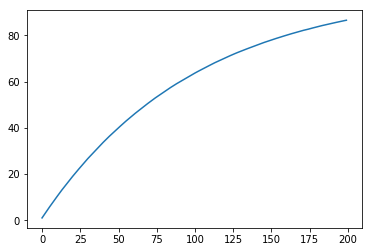

In [5]:
flip=mutation(200,1)
plt.plot(flip)
print(max(flip))


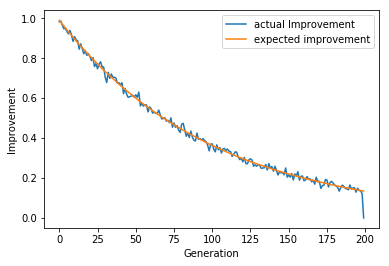

In [6]:

difference=np.zeros(200)
for i in range(199):
    difference[i]=flip[i+1]-flip[i]
    
plt.plot( difference)
plot_expectation_gen(flip, 1)
plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.legend(['actual Improvement', 'expected improvement'])
plt.show()


It is much better than Task1, since next generation can only go better or stay what they were.
In this sense, the flucation is much smaller.
But the process of getting better still take a long time.

below are cases when take 3 children each flip one bits.

99.054


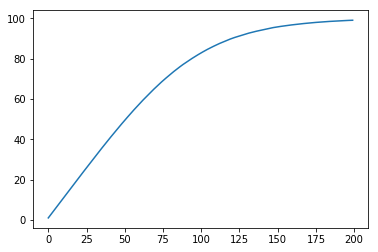

In [81]:
flip=mutation(200,3)
plt.plot(flip)
print(max(flip))

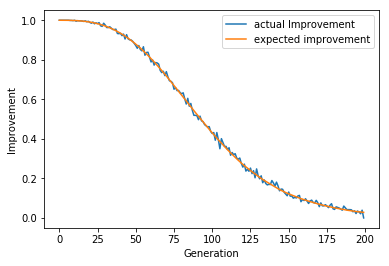

In [82]:
difference=np.zeros(200)
for i in range(199):
    difference[i]=flip[i+1]-flip[i]
plt.plot( difference)

plot_expectation_gen(flip, 3)
plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.legend(['actual Improvement', 'expected improvement'])

You could tell, at generation=100,it already arrives the same value as the case of 200th generation of only one child.
From the difference graph, you can see bewteen generation 25 to 110, the slop is steep.

99.9


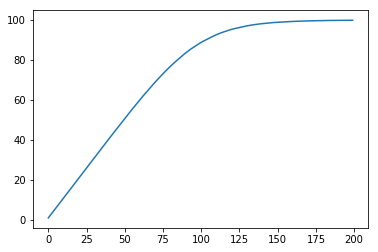

In [85]:
flip=mutation(200,5)
plt.plot(flip)
print(max(flip))

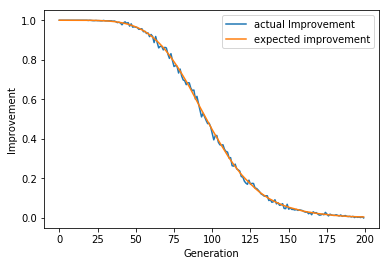

In [86]:
difference=np.zeros(200)
for i in range(199):
    difference[i]=flip[i+1]-flip[i]
plt.plot(difference)

plot_expectation_gen(flip, 5)
plt.xlabel('Generation')
plt.ylabel('Improvement')
plt.legend(['actual Improvement', 'expected improvement'])

When we use 5 children, it reaches a pretty close number to fully flip(a string of length 100 1s)
and it decrease even faster than 3 children.
It could also explain by more children of randomly flip,more possibile of getting better result.

Task 3

flips more than single one bit

Pick flip 10 bits at once

In [65]:
def mutation2(generation,children,nbits):
    x=np.zeros([1000,100])
    pre=[]
    values=np.zeros([1000,1])
    result=np.zeros(generation)
    experiment=1000
    
    for i in range(generation):  #200
        for j in range(1000):  #1000         
            pre=np.copy(x[j])
            p_value=sum(pre)
            children_order=np.zeros([children,100])
            children_value=np.zeros(children)
            
            for h in range(children):
                index=np.random.choice(100,nbits,replace=False)
                pre[index] = np.where(pre[index] == 0, 1, 0)
                children_order[h]=np.copy(pre)
                children_value[h]=sum(children_order[h])
                
                pre=np.copy(x[j])
            c_value=max(children_value)
            best=children_value.argmax()
            if p_value>c_value:
                x[j]=x[j]
            else:
                x[j]=children_order[best]
        values=np.sum(x,axis=1)
        result[i]=np.mean(values,axis=0)
    return result

In [ ]:
result=mutation2(200,1,10)

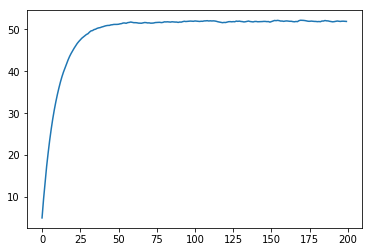

In [81]:
plt.plot(result)

You can observe, the value change rapidly at the very begining , since we started with all 0 and flip 10 can only directly go to value=10. After 20 generation, the value barely changed, and the best it can do is around value=50. By now, most of the value is already 1s, flip 10's at once could leads to worse case. But since it remembers the parents value, so it couldn't worse, but just nearly stop growing. 

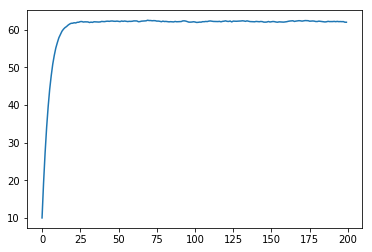

In [82]:
result=mutation2(200,3,10)
plt.plot(result)

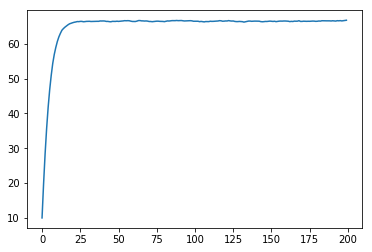

In [83]:
result=mutation2(200,5,10)
plt.plot(result)

Summerize: more children it has,more possible of next generation getting a better results. more flip it has, more rapid the value will increase in the beginning stage, however, it will reach a bottle neck, in my case, it will never go reach 100, becasue number flip os too large,it will always worse than the parents.